In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

import matplotlib.font_manager as fm    # 한글폰트
font_name = fm.FontProperties(fname = "C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family = font_name)

import matplotlib as mpl  
mpl.rcParams["axes.unicode_minus"] = False

from konlpy.tag import Okt
from konlpy.corpus import kolaw
import nltk
from wordcloud import WordCloud, STOPWORDS

from sklearn.model_selection import train_test_split

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
import warnings
warnings.filterwarnings(action="ignore")

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mpl
mpl.rcParams["axes.unicode_minus"] = False


import urllib.request as req
from urllib.request import urlopen
from urllib.error import HTTPError,URLError
import urllib.parse
from bs4 import BeautifulSoup
import requests

from sklearn import linear_model
from scipy import stats
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['figure.figsize'] = (7, 7)
plt.style.use('ggplot')
from patsy import dmatrix, dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [2]:
df = pd.read_csv("data/Byeonghap_final5.csv", index_col = 0)
df

,title,category,current_funding_amount,percentage,target_funding_amount,supporter,description
0,"짐볼로 만든 인형, '돌리볼리'",캐릭터 · 굿즈,329000,8,4112500,6,NaN
1,"함께 만드는 악기 전문 웹진, <The Strings>",출판,701000,14,5007100,27,NaN
2,감사한 분들께 드리는 마음을 담을 고급 가죽 봉투,디자인 문구,0,0,0,0,NaN
3,마다가스카르 사진전,사진,2322000,38,6110500,54,NaN
4,인형의 시간들,출판,727000,36,2019400,29,NaN
...,...,...,...,...,...,...,...
9590,메카피아의 한국 전통 자개 문양 피젯 스피너,홈 · 리빙,1730000,173,10000,27,전세계에 하나밖에 없는 한국적인 디자인의 자개 문양 메탈 피젯 스피너 프로젝트
9591,카프카 <변신> 초판본과 독서카드,출판,1730000,173,10000,114,읽고 쓰는 기쁨을 위해 책방 카프카의밤이 마련한 굿즈
9592,낯선 첫발을 내딛는 이방인을 위한 <연남동 작은 방>,출판,1730000,173,10000,54,"낯선 첫발을 내딛는 이들을 위한 에세이. 쓸쓸한 안식의, 1인분의 방 <연남동 작은 방>"
9593,함께 행복하개! 유기견 팔찌,캐릭터 · 굿즈,865000,173,5000,45,사람과 동물이 함께 행복한 세상을 만들어요~ 수익금은 동물자유연대에 기부할 예정입니다.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9710 entries, 0 to 9594
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   title                   9710 non-null   object
 1   category                9710 non-null   object
 2   current_funding_amount  9710 non-null   int64 
 3   percentage              9710 non-null   int64 
 4   target_funding_amount   9710 non-null   int64 
 5   supporter               9710 non-null   int64 
 6   description             9561 non-null   object
dtypes: int64(4), object(3)
memory usage: 606.9+ KB


In [4]:
# 인덱스 순서대로 다시 설정

index = [i for i in range(len(df))]
index

df["index"] = index

In [5]:
df = df.set_index("index")
df

,title,category,current_funding_amount,percentage,target_funding_amount,supporter,description
index,,,,,,,
0,"짐볼로 만든 인형, '돌리볼리'",캐릭터 · 굿즈,329000,8,4112500,6,NaN
1,"함께 만드는 악기 전문 웹진, <The Strings>",출판,701000,14,5007100,27,NaN
2,감사한 분들께 드리는 마음을 담을 고급 가죽 봉투,디자인 문구,0,0,0,0,NaN
3,마다가스카르 사진전,사진,2322000,38,6110500,54,NaN
4,인형의 시간들,출판,727000,36,2019400,29,NaN
...,...,...,...,...,...,...,...
9705,메카피아의 한국 전통 자개 문양 피젯 스피너,홈 · 리빙,1730000,173,10000,27,전세계에 하나밖에 없는 한국적인 디자인의 자개 문양 메탈 피젯 스피너 프로젝트
9706,카프카 <변신> 초판본과 독서카드,출판,1730000,173,10000,114,읽고 쓰는 기쁨을 위해 책방 카프카의밤이 마련한 굿즈
9707,낯선 첫발을 내딛는 이방인을 위한 <연남동 작은 방>,출판,1730000,173,10000,54,"낯선 첫발을 내딛는 이들을 위한 에세이. 쓸쓸한 안식의, 1인분의 방 <연남동 작은 방>"


In [6]:
# 결과 컬럼 추가 : 성사 - 1 , 실패 - 0

df["result"] = 3   # 아무값이나 해서 컬럼 생성

for i in range(len(df["percentage"])):
    if df["percentage"][i] >= 100:
        df["result"][i] = 1
    else: 
        df["result"][i] = 0

In [7]:
df

,title,category,current_funding_amount,percentage,target_funding_amount,supporter,description,result
index,,,,,,,,
0,"짐볼로 만든 인형, '돌리볼리'",캐릭터 · 굿즈,329000,8,4112500,6,NaN,0
1,"함께 만드는 악기 전문 웹진, <The Strings>",출판,701000,14,5007100,27,NaN,0
2,감사한 분들께 드리는 마음을 담을 고급 가죽 봉투,디자인 문구,0,0,0,0,NaN,0
3,마다가스카르 사진전,사진,2322000,38,6110500,54,NaN,0
4,인형의 시간들,출판,727000,36,2019400,29,NaN,0
...,...,...,...,...,...,...,...,...
9705,메카피아의 한국 전통 자개 문양 피젯 스피너,홈 · 리빙,1730000,173,10000,27,전세계에 하나밖에 없는 한국적인 디자인의 자개 문양 메탈 피젯 스피너 프로젝트,1
9706,카프카 <변신> 초판본과 독서카드,출판,1730000,173,10000,114,읽고 쓰는 기쁨을 위해 책방 카프카의밤이 마련한 굿즈,1
9707,낯선 첫발을 내딛는 이방인을 위한 <연남동 작은 방>,출판,1730000,173,10000,54,"낯선 첫발을 내딛는 이들을 위한 에세이. 쓸쓸한 안식의, 1인분의 방 <연남동 작은 방>",1


# 키워드 확인

## 제목 (title)

### 성공 프로젝트

In [8]:
df_success = df[df["result"] ==1]    # 성공 프로젝트만
df_success

,title,category,current_funding_amount,percentage,target_funding_amount,supporter,description,result
index,,,,,,,,
149,웹툰과 일러스트를 위한 꽃브러쉬,웹툰 리소스,49651500,4965,500000,1659,웹툰과 일러스트에 사용할수있는 꽃소재입니다.,1
150,오디오웹툰으로 만나는 <고래별_경성의 인어공주> 시즌2,웹툰 · 만화,347353000,267,500000,1712,많은 사랑을 받았던 네이버웹툰 <고래별> 오디오웹툰 펀딩이 시즌2로 돌아옵니다!,1
151,꼬마마법사 레미 공식 한정판 굿즈,영화 · 비디오,74329000,247,500000,979,방영 20주년 기념 '꼬마마법사 레미' 공식 한정판 굿즈를 소개합니다!,1
152,만화가의 금융에세이 <자산소득으로 생활하기 프로젝트>,출판,12830500,366,500000,471,1억1천400만원을 모으겠어! 노동탈출 금융에세이 <자산소득으로 생활하기 프로젝트>...,1
153,"당신을 지켜주는 영물, '메롱해치 자수 KIT'",홈 · 리빙,7777000,777,500000,298,메롱해치 자수 키트는 쉽게 프랑스 자수를 배울 수 있는 키트입니다.,1
...,...,...,...,...,...,...,...,...
9705,메카피아의 한국 전통 자개 문양 피젯 스피너,홈 · 리빙,1730000,173,10000,27,전세계에 하나밖에 없는 한국적인 디자인의 자개 문양 메탈 피젯 스피너 프로젝트,1
9706,카프카 <변신> 초판본과 독서카드,출판,1730000,173,10000,114,읽고 쓰는 기쁨을 위해 책방 카프카의밤이 마련한 굿즈,1
9707,낯선 첫발을 내딛는 이방인을 위한 <연남동 작은 방>,출판,1730000,173,10000,54,"낯선 첫발을 내딛는 이들을 위한 에세이. 쓸쓸한 안식의, 1인분의 방 <연남동 작은 방>",1


In [9]:
title = df_success["title"]
title_text = ",".join(title)
type(title_text)
title_text

'웹툰과 일러스트를 위한 꽃브러쉬,오디오웹툰으로 만나는 <고래별_경성의 인어공주> 시즌2,꼬마마법사 레미 공식 한정판 굿즈,만화가의 금융에세이 <자산소득으로 생활하기 프로젝트>,당신을 지켜주는 영물, \'메롱해치 자수 KIT\',파댕이가 돌아와따 ! [흑우 파댕이 인형],코디 걱정 없이 편하게, \'나봄 저고리 셔츠&허리치마\',[스케치업] 로판 일러스트를 위한 평민들의 거리,죽음을 연습하는 200가지 질문 -『질문의 죽음』,로맨스 판타지 웹툰에 도움이 되는 엑스트라 브러쉬,혼자하는 담력시험, 공포게임『Last Light』,[AAF] 50인의 아티스트가 해석한 <식물 합작 아트북>,오스카 와일드 <행복한 왕자> 1888년 초판 복원,변호사가 알려주는 성폭력 피해자를 위한 법률가이드,웹툰, 일러스트를 위한 100종류의 다양한 문양들,[지갑송 장편소설] <소설 속 엑스트라 큐브 편> 애장판,매일 3분 라인이 살아나는 습관,내 손으로 하이드를 깨우다, 지킬 투 하이드 잉크,목격자의 진술로 사건을 해결하는 추리 게임 [미제 사건],[CachiBag]물과 햇빛 그리고 선인장으로 빚은 가치백,시간을 담은 포스터 만화책 <MEMO> 출간,식물이 있는 우리, 타이페이식물원,길몽 팔아서 1억을 번다고요? 한국형 판타지 소설 <옥토>,우주만큼 복잡한 내 감정 찾기, 코스믹 마인드 오로라 카드,영롱한 펄과 함께 동화 속으로 초대할게요, 밀크웨이 입욕제,혹시 나도 탈모인가? 걱정한적 있다면! 헤막안티헤어로스샴푸,스케치업 해안마을과 소방차, 이삿짐차,지구 멸망을 앞둔 두 여자의 사랑 소설 <멸망의 감정>,66100 2020 브라렛,30종의 비인간 존재가 되어보는 <상괭이와 춤을> 키트,맥베스의 향기를 찾았다 <넵튠과 아포리아>,[RE:PLA] 쓰레기도 줄여주고 플라스틱 업사이클까지??,웹툰&일러스트에 활용하기 좋은 <헤일로(후광)>소재,나의 졸업을 막으려는 누군가가 있다? [공포의 조별과제],대체 불가한 독보적인 컬러의 아티스트 프롬 LP 발매,내년의 우린 좀 더 평안하고 행복하길 

In [10]:
f = open("C:/anaconda3/Lib/site-packages/konlpy/data/corpus/kolaw/tumblbug_title_success.txt", "w", encoding = "utf-8")
f.write(str(title_text))
f.close()

In [11]:
ko_text = kolaw.open("tumblbug_title_success.txt").read()
ko_text

'웹툰과 일러스트를 위한 꽃브러쉬,오디오웹툰으로 만나는 <고래별_경성의 인어공주> 시즌2,꼬마마법사 레미 공식 한정판 굿즈,만화가의 금융에세이 <자산소득으로 생활하기 프로젝트>,당신을 지켜주는 영물, \'메롱해치 자수 KIT\',파댕이가 돌아와따 ! [흑우 파댕이 인형],코디 걱정 없이 편하게, \'나봄 저고리 셔츠&허리치마\',[스케치업] 로판 일러스트를 위한 평민들의 거리,죽음을 연습하는 200가지 질문 -『질문의 죽음』,로맨스 판타지 웹툰에 도움이 되는 엑스트라 브러쉬,혼자하는 담력시험, 공포게임『Last Light』,[AAF] 50인의 아티스트가 해석한 <식물 합작 아트북>,오스카 와일드 <행복한 왕자> 1888년 초판 복원,변호사가 알려주는 성폭력 피해자를 위한 법률가이드,웹툰, 일러스트를 위한 100종류의 다양한 문양들,[지갑송 장편소설] <소설 속 엑스트라 큐브 편> 애장판,매일 3분 라인이 살아나는 습관,내 손으로 하이드를 깨우다, 지킬 투 하이드 잉크,목격자의 진술로 사건을 해결하는 추리 게임 [미제 사건],[CachiBag]물과 햇빛 그리고 선인장으로 빚은 가치백,시간을 담은 포스터 만화책 <MEMO> 출간,식물이 있는 우리, 타이페이식물원,길몽 팔아서 1억을 번다고요? 한국형 판타지 소설 <옥토>,우주만큼 복잡한 내 감정 찾기, 코스믹 마인드 오로라 카드,영롱한 펄과 함께 동화 속으로 초대할게요, 밀크웨이 입욕제,혹시 나도 탈모인가? 걱정한적 있다면! 헤막안티헤어로스샴푸,스케치업 해안마을과 소방차, 이삿짐차,지구 멸망을 앞둔 두 여자의 사랑 소설 <멸망의 감정>,66100 2020 브라렛,30종의 비인간 존재가 되어보는 <상괭이와 춤을> 키트,맥베스의 향기를 찾았다 <넵튠과 아포리아>,[RE:PLA] 쓰레기도 줄여주고 플라스틱 업사이클까지??,웹툰&일러스트에 활용하기 좋은 <헤일로(후광)>소재,나의 졸업을 막으려는 누군가가 있다? [공포의 조별과제],대체 불가한 독보적인 컬러의 아티스트 프롬 LP 발매,내년의 우린 좀 더 평안하고 행복하길 

#### 품사별 많이 쓰인 단어

In [12]:
# 형태소 분석 및 품사 태깅

okt = Okt()
token_pos = okt.pos(ko_text)        # 글자 원형으로 바꿔주기, stem=True

In [13]:
# 워드 카운팅
ko = nltk.Text(token_pos)
token_pos2 = ko.vocab().most_common(1500)        # 가장 많이 등장한 단어 1000개까지만 사용, 각각 등장한 갯수 카운팅
token_pos2

[((',', 'Punctuation'), 8266),
 (('의', 'Josa'), 2602),
 (('을', 'Josa'), 1856),
 (('<', 'Punctuation'), 1656),
 (("'", 'Punctuation'), 1480),
 (('>,', 'Punctuation'), 1141),
 (('한', 'Josa'), 875),
 (('를', 'Josa'), 850),
 ((']', 'Punctuation'), 789),
 (('에', 'Josa'), 679),
 (('위', 'Noun'), 663),
 (("',", 'Punctuation'), 663),
 (('이', 'Josa'), 639),
 (('웹툰', 'Noun'), 630),
 (('들', 'Suffix'), 630),
 (('-', 'Punctuation'), 617),
 ((':', 'Punctuation'), 555),
 (('>', 'Punctuation'), 552),
 (('!', 'Punctuation'), 550),
 (('스케치업', 'Noun'), 516),
 (('과', 'Josa'), 505),
 (('가', 'Josa'), 487),
 (('.', 'Punctuation'), 454),
 ((',[', 'Punctuation'), 439),
 (('배경', 'Noun'), 433),
 (('와', 'Josa'), 424),
 (('&', 'Punctuation'), 420),
 (('"', 'Punctuation'), 408),
 (('[', 'Punctuation'), 398),
 (('하는', 'Verb'), 359),
 (('!,', 'Punctuation'), 348),
 (('당신', 'Noun'), 343),
 (('나', 'Noun'), 322),
 (('으로', 'Josa'), 312),
 (('뱃지', 'Noun'), 298),
 (('],', 'Punctuation'), 293),
 (('로', 'Josa'), 285),
 (('집', 

In [14]:
#### token_pos2 Checkpoint

In [15]:
ad = []

for i in token_pos2:
    if i[0][1] == 'Adverb':
        ad.append((i[0][0], i[1]))
    else: 
        pass   


vb = []

for i in token_pos2:
    if i[0][1] == 'Verb':
        vb.append((i[0][0], i[1]))
    else: 
        pass


    
    
nn = []

for i in token_pos2:
    if i[0][1] == 'Noun':
        nn.append((i[0][0], i[1]))
    else: 
        pass
    
    
pc = []

for i in token_pos2:
    if i[0][1] == 'Punctuation':
        pc.append((i[0][0], i[1]))
    else: 
        pass    
    
    

print("형용사", ad)
print("-"*130)
print("동사", vb)
print("-"*130)
print("명사", nn)
print("-"*130)
print("기호", pc)

형용사 [('함께', 173), ('풍', 70), ('다', 55), ('없이', 37), ('우', 23), ('같이', 19), ('딱', 14), ('앙', 12), ('언제나', 12), ('어느', 12), ('그만', 11), ('아직도', 9)]
----------------------------------------------------------------------------------------------------------------------------------
동사 [('하는', 359), ('담은', 275), ('한', 160), ('만든', 141), ('만드는', 90), ('매거진', 87), ('할', 82), ('나를', 80), ('합니다', 77), ('탄', 67), ('하세요', 64), ('하다', 60), ('되는', 53), ('된', 51), ('하기', 48), ('담다', 48), ('싶은', 48), ('해', 46), ('만나는', 45), ('즐기는', 45), ('담아', 42), ('돌아온', 40), ('않는', 40), ('출', 39), ('쓰는', 36), ('해주세요', 36), ('담긴', 35), ('잘', 34), ('와', 33), ('빛나는', 31), ('보는', 28), ('쉽게', 26), ('만나다', 26), ('크', 25), ('낸', 24), ('품은', 24), ('가', 24), ('떠나는', 23), ('되어', 22), ('해요', 21), ('만들어', 21), ('하여', 21), ('잇', 21), ('닮은', 20), ('꿈꾸는', 20), ('보세요', 19), ('않은', 19), ('끝내는', 18), ('하지', 18), ('마시는', 18), ('어울리는', 18), ('사는', 18), ('나와', 17), ('하게', 17), ('돕는', 17), ('읽는', 17), ('몰랑', 17), ('했다', 17), ('알려주는', 16)

#### 형용사

(-0.5, 399.5, 199.5, -0.5)

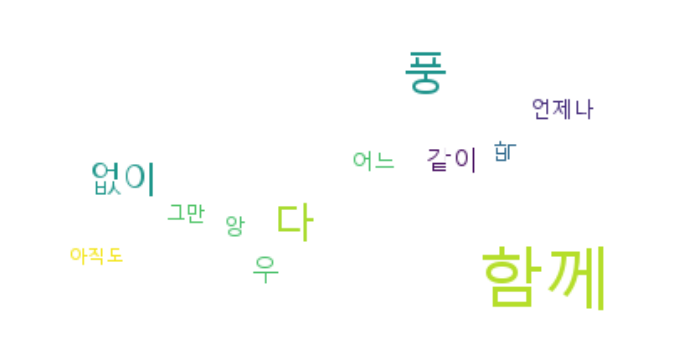

In [17]:
wc = WordCloud(max_font_size = 40, background_color = "white",
              font_path = "C:/Windows/Fonts/malgun.ttf").generate_from_frequencies(dict(ad))   # 튜플로 묶어진 것을 딕트로

plt.figure(figsize = (12, 12))
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")

#### 동사

(-0.5, 399.5, 199.5, -0.5)

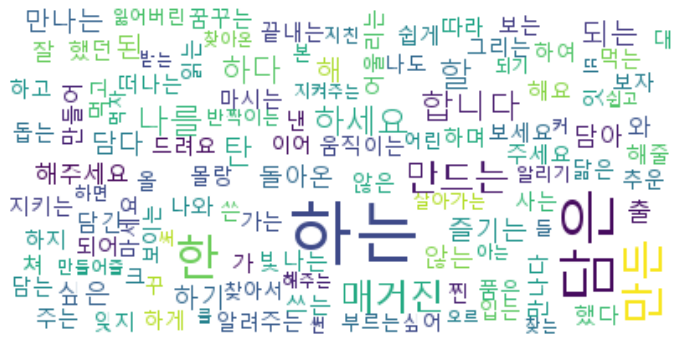

In [18]:
wc = WordCloud(max_font_size = 40, background_color = "white",
              font_path = "C:/Windows/Fonts/malgun.ttf").generate_from_frequencies(dict(vb))   # 튜플로 묶어진 것을 딕트로

plt.figure(figsize = (12, 12))
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")

#### 기호

(-0.5, 399.5, 199.5, -0.5)

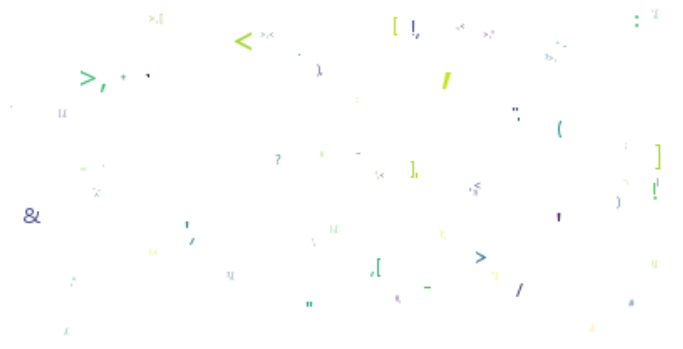

In [19]:
wc = WordCloud(max_font_size = 40, background_color = "white",
              font_path = "C:/Windows/Fonts/malgun.ttf").generate_from_frequencies(dict(pc))   # 튜플로 묶어진 것을 딕트로

plt.figure(figsize = (12, 12))
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")

#### 명사 키워드

In [20]:
# 형태소 중 명사만

okt = Okt()
token_ko = okt.nouns(ko_text)
token_ko
print(len(token_ko))

53062


In [21]:
# 불용어 처리
stop_words = ["제", "월", "일", "조", "때", "그", "이", "바", "및", "안", "정", "위", "관", "수", "프로젝트", "내", "종", "속", "를", "것", "의"]
token_ko = [word for word in token_ko if word not in stop_words] 


# 워드 카운팅
ko = nltk.Text(token_ko)
data = ko.vocab().most_common(50)        # 가장 많이 등장한 단어 50개까지, 각각 등장한 갯수 카운팅
data

[('웹툰', 630),
 ('스케치업', 516),
 ('배경', 433),
 ('당신', 343),
 ('나', 322),
 ('뱃지', 298),
 ('집', 284),
 ('이야기', 280),
 ('우리', 276),
 ('세트', 243),
 ('고양이', 194),
 ('북', 190),
 ('여행', 175),
 ('여성', 175),
 ('판타지', 173),
 ('달력', 171),
 ('일상', 171),
 ('선물', 171),
 ('세상', 170),
 ('책', 165),
 ('향기', 159),
 ('꽃', 157),
 ('제작', 150),
 ('굿', 144),
 ('일러스트', 138),
 ('마음', 137),
 ('브러쉬', 135),
 ('한국', 135),
 ('사랑', 135),
 ('향수', 135),
 ('봄', 126),
 ('커피', 125),
 ('더', 123),
 ('첫', 123),
 ('향', 122),
 ('앵콜', 115),
 ('가지', 114),
 ('겨울', 104),
 ('티', 102),
 ('게임', 101),
 ('너', 99),
 ('사람', 99),
 ('키트', 98),
 ('기억', 98),
 ('여름', 97),
 ('카드', 93),
 ('시리즈', 93),
 ('시간', 92),
 ('가방', 92),
 ('디자인', 92)]

(-0.5, 399.5, 199.5, -0.5)

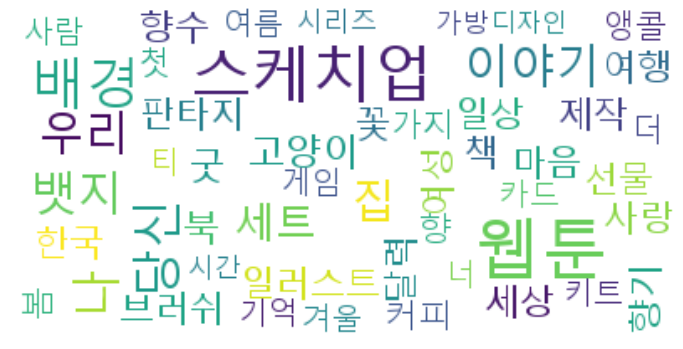

In [22]:
wc = WordCloud(max_font_size = 40, background_color = "white",
              font_path = "C:/Windows/Fonts/malgun.ttf").generate_from_frequencies(dict(data))   # 튜플로 묶어진 것을 딕트로

plt.figure(figsize = (12, 12))
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")

## 실패한 프로젝트

### 제목

In [23]:
# 실패한 프로젝트

df_failed = df[df["result"] == 0]

title = df_failed["title"]
title_text = ",".join(title)
type(title_text)
title_text

f = open("C:/anaconda3/Lib/site-packages/konlpy/data/corpus/kolaw/tumblbug_title_failed.txt", "w", encoding = "utf-8")
f.write(str(title_text))
f.close()

In [24]:
ko_text = kolaw.open("tumblbug_title_failed.txt").read()
ko_text

'짐볼로 만든 인형, \'돌리볼리\',함께 만드는 악기 전문 웹진, <The Strings>,감사한 분들께 드리는 마음을 담을 고급 가죽 봉투,마다가스카르 사진전,인형의 시간들,나무로 만든, 만년달력 연필꽂이,생활의 바다에서 플라스틱 쓰레기를 없애는 [바벗 카드지갑],달파란 첫번째 일러스트 아트북,ROPEAN의 첫 번째 프로젝트; TEXAS TRUCK,우리 아이 첫 성교육 지침서,화투로 니냐노 놀아보자!,여름에 자유를 더하다! FREEDOM 일러스트 면 티셔츠,고양이왕 뱃지와 기타 굿즈 제작,2021 미니멀라이프 이태리 베지터블가죽 핸드폰 카드지갑,나만의 옷을 만들자!,길고양이 캐릭터 마마마 굿즈 만들기!,당신만을 위해 제작하는, 버블 이니셜 목걸이,「 바라보다; 자폐성 장애 인식 개선 전시회 」,고민하는 크리스챤을 위한, 기억하고 기도하기 위한 뱃지,내 방안의 작은 겨울 - 핸드메이드 월행잉,소비자와 광고주가 원하는 진짜 광고플렛폼 !!,비싼 이어폰! 관리 제대로 하고 계신가요?가죽 이어폰케이스,눈꽃과 함께 찾아온 겨울새 뱃지,어른이를 위한 칭찬스티커판, [라이크플로우판],판타지 비주얼 노벨 게임 <블루문 파크>, PC판 출시!,판타지 랜덤 디펜스 모바일,특별하고 소중한 한 권의 책을 위한 \'한 곳\',나의 여름을 더 빛내줄 매력적인 일러스트 비치타올,리이슈 코리아 아트페어: 서울,당신을 위한 평생 친구이자 특별한 선물, 아토,1장 그림책 \'복숭아는 복숭복숭\' 만들기,멸종 위기 동물 뱃지, \'라니\'와 \'네오\',멸종위기동물 뱃지 WITH US,웹툰배경 스케치업-모던 단독주택,박현종의 겨울콘서트 <마음>,무농약 자색 양파를 (즙즙즙),인류의 절반은 생리를 한다. 그림 에세이 <생리 중이야>,웹툰 배경 스케치업- 단독주택 및 주거공간,내 손안의 작은 숲, 이끼 테라리움,생각 많은 밤, 5가지 후드티,영화 배뱅이굿 사전제작비,인장이와 인정이는 지금 휴가중! "선인장 뱃지",Would you like 우주?,뭉글뭉글 고양이 뱃지,소아암 환아들의 러브하우스

In [25]:
# 형태소 분석 및 품사 태깅

okt = Okt()
token_pos3 = okt.pos(ko_text)        # 글자 원형으로 바꿔주기, stem=True

# 워드 카운팅
ko = nltk.Text(token_pos)
token_pos4 = ko.vocab().most_common(1700)        # 가장 많이 등장한 단어 1000개까지만 사용, 각각 등장한 갯수 카운팅
token_pos4

[((',', 'Punctuation'), 8266),
 (('의', 'Josa'), 2602),
 (('을', 'Josa'), 1856),
 (('<', 'Punctuation'), 1656),
 (("'", 'Punctuation'), 1480),
 (('>,', 'Punctuation'), 1141),
 (('한', 'Josa'), 875),
 (('를', 'Josa'), 850),
 ((']', 'Punctuation'), 789),
 (('에', 'Josa'), 679),
 (('위', 'Noun'), 663),
 (("',", 'Punctuation'), 663),
 (('이', 'Josa'), 639),
 (('웹툰', 'Noun'), 630),
 (('들', 'Suffix'), 630),
 (('-', 'Punctuation'), 617),
 ((':', 'Punctuation'), 555),
 (('>', 'Punctuation'), 552),
 (('!', 'Punctuation'), 550),
 (('스케치업', 'Noun'), 516),
 (('과', 'Josa'), 505),
 (('가', 'Josa'), 487),
 (('.', 'Punctuation'), 454),
 ((',[', 'Punctuation'), 439),
 (('배경', 'Noun'), 433),
 (('와', 'Josa'), 424),
 (('&', 'Punctuation'), 420),
 (('"', 'Punctuation'), 408),
 (('[', 'Punctuation'), 398),
 (('하는', 'Verb'), 359),
 (('!,', 'Punctuation'), 348),
 (('당신', 'Noun'), 343),
 (('나', 'Noun'), 322),
 (('으로', 'Josa'), 312),
 (('뱃지', 'Noun'), 298),
 (('],', 'Punctuation'), 293),
 (('로', 'Josa'), 285),
 (('집', 

In [26]:
ad = []

for i in token_pos4:
    if i[0][1] == 'Adverb':
        ad.append((i[0][0], i[1]))
    else: 
        pass   


vb = []

for i in token_pos4:
    if i[0][1] == 'Verb':
        vb.append((i[0][0], i[1]))
    else: 
        pass


    
    
nn = []

for i in token_pos4:
    if i[0][1] == 'Noun':
        nn.append((i[0][0], i[1]))
    else: 
        pass
    
    
pc = []

for i in token_pos4:
    if i[0][1] == 'Punctuation':
        pc.append((i[0][0], i[1]))
    else: 
        pass    
    
    

print("형용사", ad)
print("-"*130)
print("동사", vb)
print("-"*130)
print("명사", nn)
print("-"*130)
print("기호", pc)

형용사 [('함께', 173), ('풍', 70), ('다', 55), ('없이', 37), ('우', 23), ('같이', 19), ('딱', 14), ('앙', 12), ('언제나', 12), ('어느', 12), ('그만', 11), ('아직도', 9)]
----------------------------------------------------------------------------------------------------------------------------------
동사 [('하는', 359), ('담은', 275), ('한', 160), ('만든', 141), ('만드는', 90), ('매거진', 87), ('할', 82), ('나를', 80), ('합니다', 77), ('탄', 67), ('하세요', 64), ('하다', 60), ('되는', 53), ('된', 51), ('하기', 48), ('담다', 48), ('싶은', 48), ('해', 46), ('만나는', 45), ('즐기는', 45), ('담아', 42), ('돌아온', 40), ('않는', 40), ('출', 39), ('쓰는', 36), ('해주세요', 36), ('담긴', 35), ('잘', 34), ('와', 33), ('빛나는', 31), ('보는', 28), ('쉽게', 26), ('만나다', 26), ('크', 25), ('낸', 24), ('품은', 24), ('가', 24), ('떠나는', 23), ('되어', 22), ('해요', 21), ('만들어', 21), ('하여', 21), ('잇', 21), ('닮은', 20), ('꿈꾸는', 20), ('보세요', 19), ('않은', 19), ('끝내는', 18), ('하지', 18), ('마시는', 18), ('어울리는', 18), ('사는', 18), ('나와', 17), ('하게', 17), ('돕는', 17), ('읽는', 17), ('몰랑', 17), ('했다', 17), ('알려주는', 16)

#### 형용사

(-0.5, 399.5, 199.5, -0.5)

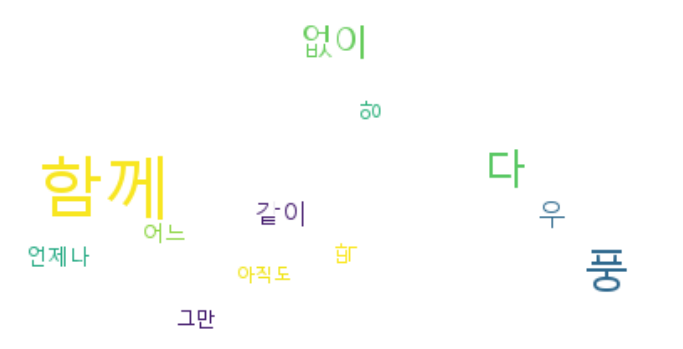

In [27]:
wc = WordCloud(max_font_size = 40, background_color = "white",
              font_path = "C:/Windows/Fonts/malgun.ttf").generate_from_frequencies(dict(ad))   # 튜플로 묶어진 것을 딕트로

plt.figure(figsize = (12, 12))
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")

#### 동사

(-0.5, 399.5, 199.5, -0.5)

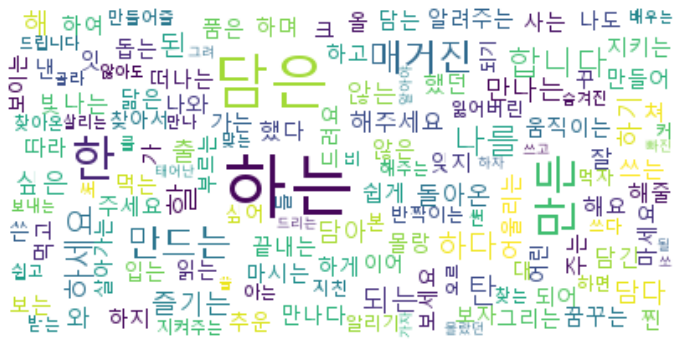

In [28]:
wc = WordCloud(max_font_size = 40, background_color = "white",
              font_path = "C:/Windows/Fonts/malgun.ttf").generate_from_frequencies(dict(vb))   # 튜플로 묶어진 것을 딕트로

plt.figure(figsize = (12, 12))
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")

#### 기호

(-0.5, 399.5, 199.5, -0.5)

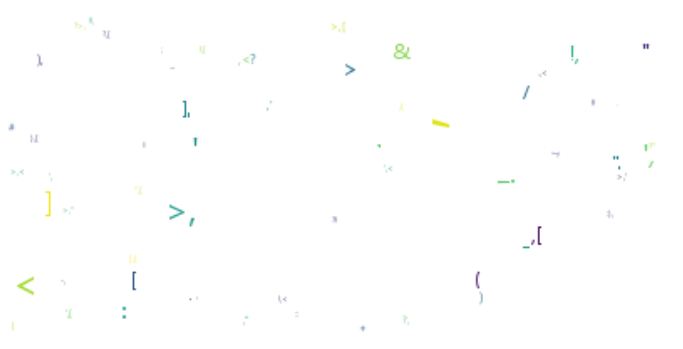

In [29]:
wc = WordCloud(max_font_size = 40, background_color = "white",
              font_path = "C:/Windows/Fonts/malgun.ttf").generate_from_frequencies(dict(pc))   # 튜플로 묶어진 것을 딕트로

plt.figure(figsize = (12, 12))
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")

#### 명사

(-0.5, 399.5, 199.5, -0.5)

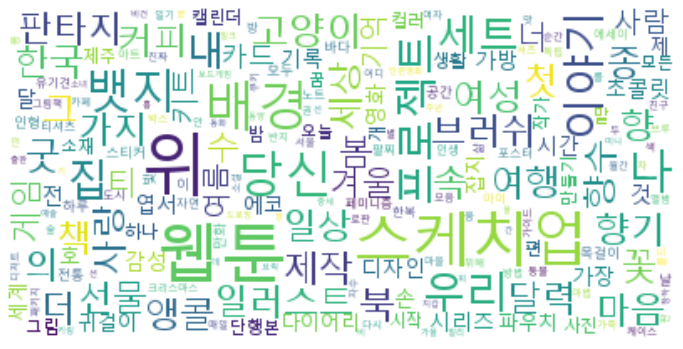

In [30]:
wc = WordCloud(max_font_size = 40, background_color = "white",
              font_path = "C:/Windows/Fonts/malgun.ttf").generate_from_frequencies(dict(nn))   # 튜플로 묶어진 것을 딕트로

plt.figure(figsize = (12, 12))
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")

# 2. 데이터 셋 구분

### 전체 프로젝트 제목을 성공프로젝트의 형태소들과 비교

In [31]:
token_pos2         # 성공 프로젝트 빈도 수 상위 1000개까지만 사용

title_X= df["title"]              
title_y= df["result"]

compare_list = []
for a in token_pos2:
    compare_list.append(a[0][0])

compare_list

def frequency(doc):          # title
        return [doc.count(i) for i in compare_list]


In [32]:
match_cnt = [frequency(sentence) for sentence in title_X]       # 각 title 문장마다 상위 1000개 단어와 매칭되는 형태소? 갯수


match_int = []                 # [] 빼도록
for i in match_cnt:
    match_int.append(i[0])
    
df["match_cnt"] = pd.Series(match_int)                      # 기존 df에 추가

In [33]:
df

,title,category,current_funding_amount,percentage,target_funding_amount,supporter,description,result,match_cnt
index,,,,,,,,,
0,"짐볼로 만든 인형, '돌리볼리'",캐릭터 · 굿즈,329000,8,4112500,6,NaN,0,1
1,"함께 만드는 악기 전문 웹진, <The Strings>",출판,701000,14,5007100,27,NaN,0,1
2,감사한 분들께 드리는 마음을 담을 고급 가죽 봉투,디자인 문구,0,0,0,0,NaN,0,0
3,마다가스카르 사진전,사진,2322000,38,6110500,54,NaN,0,0
4,인형의 시간들,출판,727000,36,2019400,29,NaN,0,0
...,...,...,...,...,...,...,...,...,...
9705,메카피아의 한국 전통 자개 문양 피젯 스피너,홈 · 리빙,1730000,173,10000,27,전세계에 하나밖에 없는 한국적인 디자인의 자개 문양 메탈 피젯 스피너 프로젝트,1,0
9706,카프카 <변신> 초판본과 독서카드,출판,1730000,173,10000,114,읽고 쓰는 기쁨을 위해 책방 카프카의밤이 마련한 굿즈,1,0
9707,낯선 첫발을 내딛는 이방인을 위한 <연남동 작은 방>,출판,1730000,173,10000,54,"낯선 첫발을 내딛는 이들을 위한 에세이. 쓸쓸한 안식의, 1인분의 방 <연남동 작은 방>",1,0


In [34]:
del df["description"]  # 필요없는 컬럼 삭제

In [35]:
##### checkpoint

df.to_csv("data/title_match_cnt.csv")

In [36]:
# df를 훈련용과 테스트용으로 나누기

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold 

kf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)     # 4개 훈련용, 1개 테스트용

df["fold"] = -1        # 초기화

for idx, (t, v) in enumerate(kf.split(df, df["match_cnt"]), 1):
    print(t, v, len(v))
    df.loc[v, "fold"] = idx
    
# 왼쪽은 훈련용(인덱스), 오른쪽은 테스트용

[   1    2    3 ... 9707 9708 9709] [   0    8   14 ... 9683 9694 9696] 1942
[   0    1    2 ... 9706 9707 9709] [   4    9   16 ... 9703 9704 9708] 1942
[   0    1    2 ... 9705 9706 9708] [   3    5    6 ... 9701 9707 9709] 1942
[   0    3    4 ... 9707 9708 9709] [   1    2   11 ... 9691 9705 9706] 1942
[   0    1    2 ... 9707 9708 9709] [   7   12   15 ... 9684 9700 9702] 1942


In [37]:
df

,title,category,current_funding_amount,percentage,target_funding_amount,supporter,result,match_cnt,fold
index,,,,,,,,,
0,"짐볼로 만든 인형, '돌리볼리'",캐릭터 · 굿즈,329000,8,4112500,6,0,1,1
1,"함께 만드는 악기 전문 웹진, <The Strings>",출판,701000,14,5007100,27,0,1,4
2,감사한 분들께 드리는 마음을 담을 고급 가죽 봉투,디자인 문구,0,0,0,0,0,0,4
3,마다가스카르 사진전,사진,2322000,38,6110500,54,0,0,3
4,인형의 시간들,출판,727000,36,2019400,29,0,0,2
...,...,...,...,...,...,...,...,...,...
9705,메카피아의 한국 전통 자개 문양 피젯 스피너,홈 · 리빙,1730000,173,10000,27,1,0,4
9706,카프카 <변신> 초판본과 독서카드,출판,1730000,173,10000,114,1,0,4
9707,낯선 첫발을 내딛는 이방인을 위한 <연남동 작은 방>,출판,1730000,173,10000,54,1,0,3


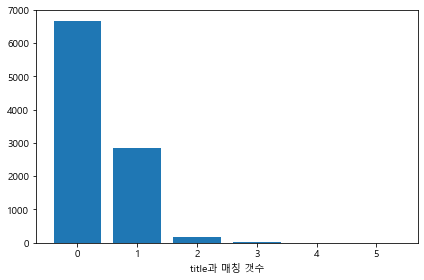

In [38]:
# 전체 프로젝트 제목을 성공프로젝트의 형태소들과 비교했을 때

val_cnt = df[df["fold"] != 0 ]["match_cnt"].value_counts().sort_index()  

plt.bar(range(len(val_cnt)), val_cnt.values)
plt.xticks(range(len(val_cnt)), val_cnt.index.values) 
plt.xlabel("title과 매칭 갯수")
plt.tight_layout()  

### 실패 프로젝트 제목을 성공프로젝트의 형태소들과 비교할 때

In [39]:
token_pos2         # 빈도 수 상위 1000개까지만 사용
#intro_token_pos2

title_X = df_failed["title"]        # 실패 프로젝트의 title과 성공프로젝트의 형태소 비교 위한 버전
#title_X= df["title"]    # 성공 프로젝트의 title과 성공프로젝트의 형태소 비교 위한 버전
title_y= df["result"]

def frequency(doc):          # title
    compare_list = []

    for a in token_pos2:
        compare_list.append(a[0][0])
        return [doc.count(i) for i in compare_list]

match_cnt = [frequency(sentence) for sentence in title_X]       # 각 title 문장마다 상위 1000개 단어와 매칭되는 형태소? 갯수


match_int = []                 # [] 빼도록
for i in match_cnt:
    match_int.append(i[0])
    
df_failed["match_cnt"] = pd.Series(match_int)                      # 기존 df에 추가

In [40]:
# df를 훈련용과 테스트용으로 나누기

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold 

kf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)     # 4개 훈련용, 1개 테스트용

df_failed["fold"] = -1        # 초기화

for idx, (t, v) in enumerate(kf.split(df_failed, df_failed["match_cnt"]), 1):
    print(t, v, len(v))
    df_failed.loc[v, "fold"] = idx
    
# 왼쪽은 훈련용(인덱스), 오른쪽은 테스트용

[  0   1   2   4   5   6   7   8   9  10  11  12  13  15  16  18  20  22
  23  25  26  27  28  29  30  32  33  34  36  37  40  41  43  45  46  47
  48  49  50  51  52  53  54  56  57  58  59  62  63  64  65  66  67  68
  69  70  71  73  75  76  77  78  79  80  81  82  84  85  86  87  88  90
  91  92  93  94  96  97  98  99 100 102 103 104 106 107 108 110 111 112
 113 114 115 116 118 119 120 121 122 123 124 125 126 127 128 130 131 132
 133 134 135 137 138 139 141 142 143 146 147] [  3  14  17  19  21  24  31  35  38  39  42  44  55  60  61  72  74  83
  89  95 101 105 109 117 129 136 140 144 145 148] 30
[  0   1   2   3   4   5   6   7   9  10  11  12  13  14  16  17  18  19
  20  21  22  23  24  25  28  31  34  35  36  37  38  39  42  43  44  45
  46  47  48  49  50  55  57  58  59  60  61  62  63  66  67  68  70  71
  72  73  74  75  76  77  78  79  82  83  84  85  86  87  88  89  92  95
  96  97  98 100 101 102 103 104 105 106 108 109 110 111 112 113 114 115
 116 117 118 119 120 123 

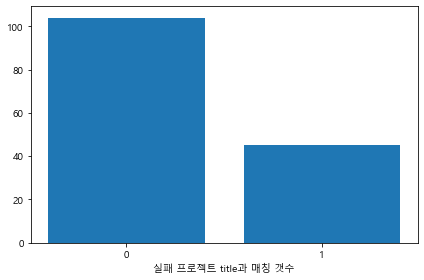

In [41]:
# 실패 프로젝트 제목을 성공프로젝트의 형태소들과 비교했을 때
val_cnt = df_failed[df_failed["fold"] != 0 ]["match_cnt"].value_counts().sort_index()  # 잘 섞였는지 확인

plt.bar(range(len(val_cnt)), val_cnt.values)
plt.xticks(range(len(val_cnt)), val_cnt.index.values) 
plt.xlabel("실패 프로젝트 title과 매칭 갯수")
plt.tight_layout()  


In [42]:
df

,title,category,current_funding_amount,percentage,target_funding_amount,supporter,result,match_cnt,fold
index,,,,,,,,,
0,"짐볼로 만든 인형, '돌리볼리'",캐릭터 · 굿즈,329000,8,4112500,6,0,1,1
1,"함께 만드는 악기 전문 웹진, <The Strings>",출판,701000,14,5007100,27,0,1,4
2,감사한 분들께 드리는 마음을 담을 고급 가죽 봉투,디자인 문구,0,0,0,0,0,0,4
3,마다가스카르 사진전,사진,2322000,38,6110500,54,0,0,3
4,인형의 시간들,출판,727000,36,2019400,29,0,0,2
...,...,...,...,...,...,...,...,...,...
9705,메카피아의 한국 전통 자개 문양 피젯 스피너,홈 · 리빙,1730000,173,10000,27,1,0,4
9706,카프카 <변신> 초판본과 독서카드,출판,1730000,173,10000,114,1,0,4
9707,낯선 첫발을 내딛는 이방인을 위한 <연남동 작은 방>,출판,1730000,173,10000,54,1,0,3


In [43]:
print("변수들의 최솟값: \n", df.min())
print("-----------------------------------------------------")
print("변수들의 최댓값: \n", df.max())       

변수들의 최솟값: 
 title                     " 매-일 2022 담음 일기장 "
category                                   공연
current_funding_amount                      0
percentage                                  0
target_funding_amount                       0
supporter                                   0
result                                      0
match_cnt                                   0
fold                                        1
dtype: object
-----------------------------------------------------
변수들의 최댓값: 
 title                     ［스케치업 웹툰배경］-톨 게이트&터널
category                                홈 · 리빙
current_funding_amount              2636684000
percentage                               38696
target_funding_amount                389400000
supporter                                72513
result                                       1
match_cnt                                    5
fold                                         5
dtype: object


# match_cnt 상관분석

In [57]:
data_set = df[["match_cnt","result"]]
data_set

,match_cnt,result
index,,
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0
...,...,...
9705,0,1
9706,0,1
9707,0,1


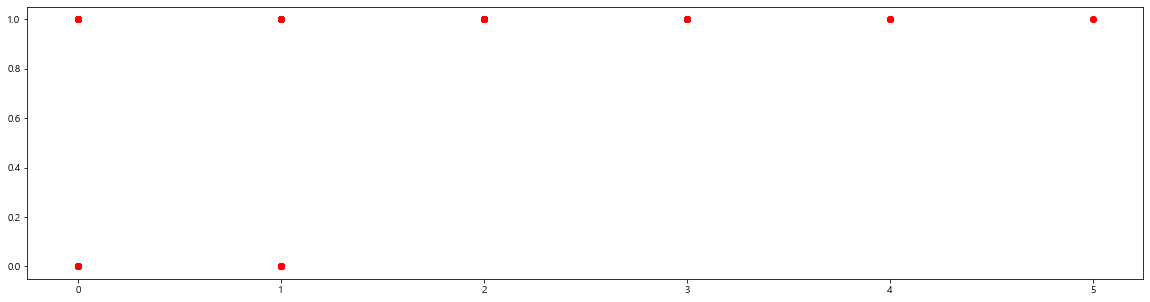

In [58]:
plt.figure(figsize=(20,5))

plt.scatter(data_set["match_cnt"],data_set["result"], color="red")

plt.show()

In [63]:
# 피어슨 상관관계
rho, p_val = stats.pearsonr(data_set["match_cnt"],data_set["result"])

print("correlation coefficient : {}, p-value:{}".format(rho, p_val))

correlation coefficient : 0.008237029323672252, p-value:0.41703230356973825


In [64]:
# 스피어만 상관관계
rho, p_val = stats.spearmanr(data_set["match_cnt"],data_set["result"])

print("correlation coefficient : {}, p-value:{}".format(rho, p_val))

correlation coefficient : 0.004518560502106351, p-value:0.656174587631676


In [65]:
# 켄달타우 상관관계
rho, p_val = stats.kendalltau(data_set["match_cnt"],data_set["result"])

print("correlation coefficient : {}, p-value:{}".format(rho, p_val))

correlation coefficient : 0.004476277554749786, p-value:0.6561513763968301


# match_cnt 회귀 분석

In [66]:
# 독립변수 : X 

X = df[['match_cnt']]
print(type(X)) 


# 종속변수 : y 

y = df['result']
print(type(y))



<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [67]:
# 데이터셋 구분 - 훈련용(train data) / 검증용(test data)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=10)
print('train data 개수: ', len(X_train))
print('test data 개수: ', len(X_test))


train data 개수:  6797
test data 개수:  2913


In [68]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()


In [69]:
# train data를 가지고 모형 학습

# X_train : 훈련데이터. y_train : 정답

lr.fit(X_train, y_train)

LinearRegression()

In [70]:
# 결정계수(R 제곱)

r_square = lr.score(X_test, y_test)
print(r_square)


-6.215219342853295e-05


In [71]:
# 기울기

print("기울기 a:", lr.coef_)

기울기 a: [0.00217065]


In [72]:
# y 절편

print("y 절편 b:", lr.intercept_)

y 절편 b: 0.9842678063380156


In [73]:
# 테스트하기. 전체 데이터 사용.
# pred : 예측한 값

pred = lr.predict(X)

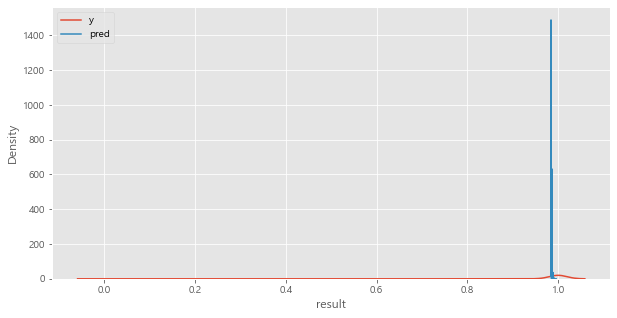

In [74]:
# 원래 값 y와 예측된 값 pred 데이터를 그래프로 작성하기


plt.figure(figsize=(10,5))
ax1 = sns.kdeplot(y, label="y")                   # 실제 result 데이터의 그래프(정답). kdeplot : 빈도수, 밀도에 해당
ax2 = sns.kdeplot(pred, label='pred', ax=ax1)   # 예측한 값 
plt.legend()
plt.show()